In [1]:
xlsx = pd.read_excel("daum(kakao+naver)+naver(kakao).xlsx")
xlsx.to_csv("daum(kakao+naver)+naver(kakao).csv")

In [2]:
xlsx = pd.read_excel("naverpo_naver.xlsx")
xlsx.to_csv("naverpo_naver.csv")

In [3]:
import pandas as pd 
train_data = pd.read_csv("daum(kakao+naver)+naver(kakao).csv") 
test_data = pd.read_csv("naverpo_naver.csv")

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

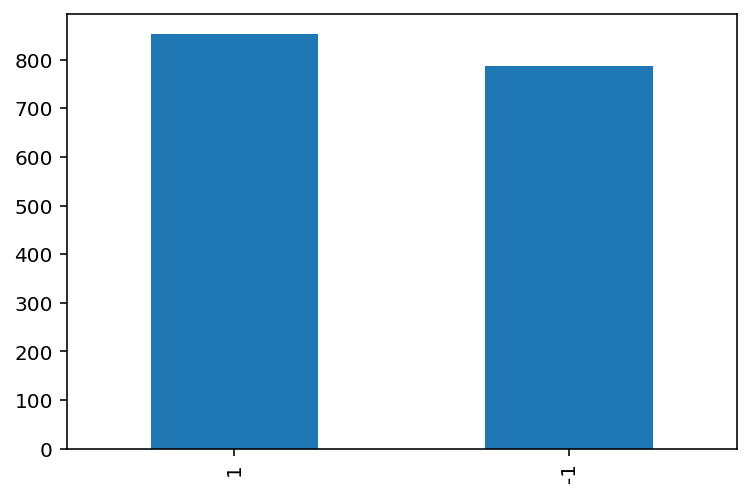

In [5]:
train_data['label'].value_counts().plot(kind='bar')

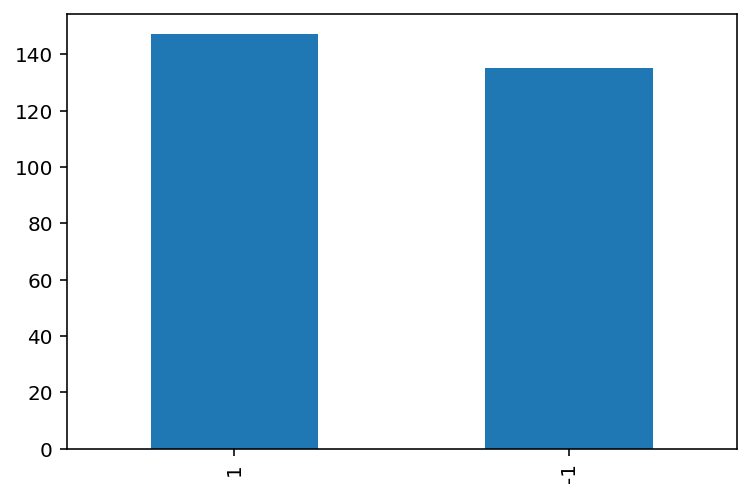

In [6]:
test_data['label'].value_counts().plot(kind='bar')

In [7]:
print(train_data.groupby('label').size().reset_index(name='count')) 
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    788
1      1    852
   label  count
0     -1    135
1      1    147


In [8]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍',
             '과', '도', '를', '으로', '자', '에', '와', '한', '하다',',','...','..','.',"'",'?','"','!','.']

In [9]:
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 
for sentence in train_data['title']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_train.append(temp_X) 
    
X_test = [] 
for sentence in test_data['title']: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
    X_test.append(temp_X)

In [10]:
print(X_train[:3])

[['카카오', '주가', '더', '오르다', "?…'", '것', '만', '보다', '안다'], ['[', '오늘', '목표', '주가', ']', '삼성', 'SDI', '·', '천보', '·', '씨', '에스', '윈드', '·', '카카오', '목표', '주가', '↑'], ['카카오', '최대', '매출', '주가', '호조', "'…", '증권', '목표', '주가', '상향']]


In [15]:
!pip install keras

In [28]:
!pip install tensorflow

  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)
Processing c:\users\alal8\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.34.0-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.23.0-py2.py3-none-any.whl (114 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-n

In [11]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 :  22
제목의 평균 길이 :  11.553658536585365


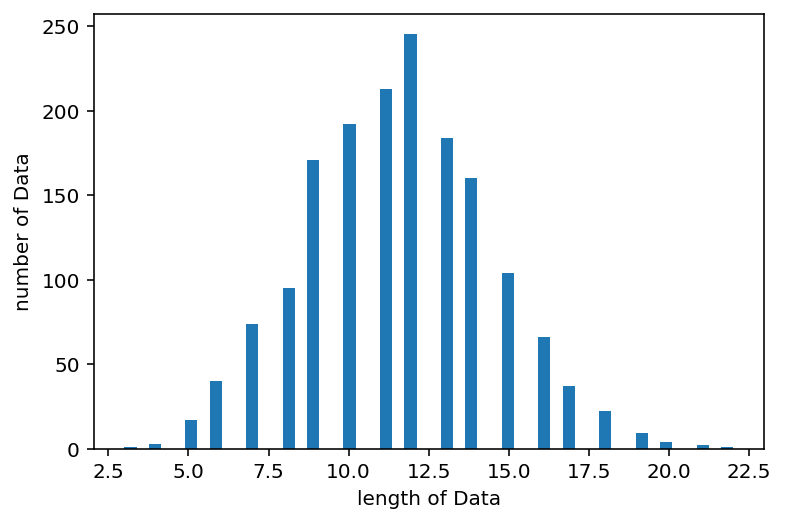

In [12]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  25
제목의 평균 길이 :  9.453900709219859


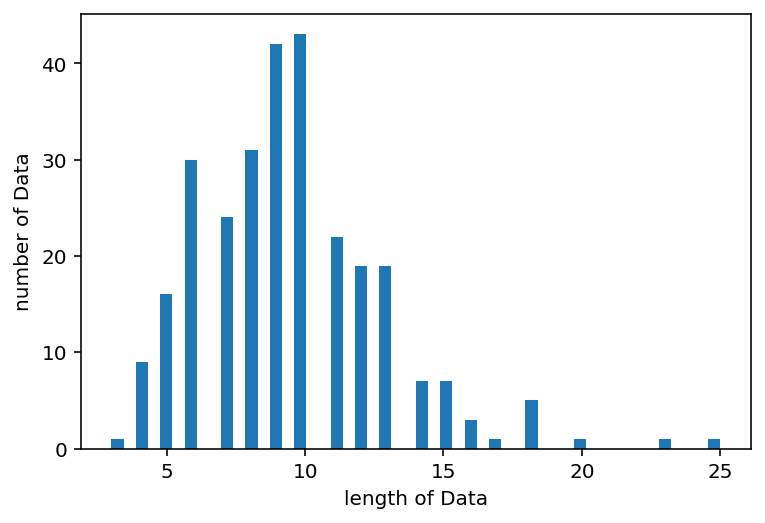

In [13]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [14]:
y_train = [] 
y_test = [] 

for i in range(len(train_data['label'])): 
    if train_data['label'].iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train_data['label'].iloc[i] == 0: 
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == -1: 
        y_train.append([1, 0, 0]) 
        
for i in range(len(test_data['label'])): 
    if test_data['label'].iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_data['label'].iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_data['label'].iloc[i] == -1: 
        y_test.append([1, 0, 0]) 
        
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [15]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [16]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
148/148 [==============================] - 6s 41ms/step - loss: 0.6320 - accuracy: 0.6443 - val_loss: 0.4942 - val_accuracy: 0.7927
Epoch 2/10
148/148 [==============================] - 6s 40ms/step - loss: 0.2486 - accuracy: 0.9011 - val_loss: 0.4468 - val_accuracy: 0.8415
Epoch 3/10
148/148 [==============================] - 6s 39ms/step - loss: 0.1094 - accuracy: 0.9627 - val_loss: 0.4376 - val_accuracy: 0.8841
Epoch 4/10
148/148 [==============================] - 7s 50ms/step - loss: 0.0613 - accuracy: 0.9736 - val_loss: 0.6614 - val_accuracy: 0.8659
Epoch 5/10
148/148 [==============================] - 9s 64ms/step - loss: 0.0324 - accuracy: 0.9878 - val_loss: 0.6136 - val_accuracy: 0.8841
Epoch 6/10
148/148 [==============================] - 11s 71ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.7941 - val_accuracy: 0.8598
Epoch 7/10
148/148 [==============================] - 9s 61ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.8476 - val_accuracy: 0.872

In [17]:
print("\n 테스트 정확도 : {:.2f}".format(model.evaluate(X_test, y_test)[1]*100))

9/9 [==============================] - 0s 7ms/step - loss: 0.9045 - accuracy: 0.9007

 테스트 정확도 : 90.07


In [18]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
148/148 [==============================] - 6s 44ms/step - loss: 0.6477 - accuracy: 0.6220 - val_loss: 0.4388 - val_accuracy: 0.8171
Epoch 2/10
148/148 [==============================] - 8s 53ms/step - loss: 0.1975 - accuracy: 0.9289 - val_loss: 0.3457 - val_accuracy: 0.8720
Epoch 3/10
148/148 [==============================] - 11s 78ms/step - loss: 0.0363 - accuracy: 0.9912 - val_loss: 0.3846 - val_accuracy: 0.8963
Epoch 4/10
148/148 [==============================] - 15s 99ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.4733 - val_accuracy: 0.8659
Epoch 5/10
148/148 [==============================] - 13s 85ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 0.8963
Epoch 6/10
148/148 [==============================] - 13s 86ms/step - loss: 5.6159e-04 - accuracy: 1.0000 - val_loss: 0.6570 - val_accuracy: 0.8780
Epoch 7/10
148/148 [==============================] - 14s 95ms/step - loss: 3.5219e-04 - accuracy: 1.0000 - val_loss: 0.6874 - val_acc

In [19]:
print("\n 테스트 정확도 : {:.2f}".format(model.evaluate(X_test, y_test)[1]*100))

9/9 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.8830

 테스트 정확도 : 88.30


In [20]:
predict = model.predict(X_test)

In [21]:
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)

In [22]:
for i in range(30): 
    print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

기사제목 :  ‘손잡은 포식자들’ CJ-네이버, 주가도 승자 독식? /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  CJ·네이버 약점 보완…주가 중장기 긍정적 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  한 배를 탄 네이버·CJ, 주가는 엇갈렸다 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  “테슬라 주가 네이버에서 확인하자”···모바일 증권 ‘해외 종목’ 서비스 시작 /	 원래 라벨 :  0 /	예측한 라벨 :  2
기사제목 :  테슬라 주가는?…네이버증권, 해외 주식 정보 모바일 서비스 시작 /	 원래 라벨 :  0 /	예측한 라벨 :  2
기사제목 :  "테슬라 주가, 네이버 모바일서도 뜬다"…해외 5개국 주식 서비스 개시 /	 원래 라벨 :  0 /	예측한 라벨 :  2
기사제목 :  '주가 더블' 네이버·카카오, 지금 사도 될까[머니뭐니] /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  네이버 주가 더 오른다? 내일 뚜껑 여는 실적보다 중요한 것 /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  “네이버, 주가 상승에도 성장성 돋보여... 목표가 ↑” /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  ‘코로나19 재유행’ 국민은 ‘불안감’, 네이버·카카오 주가는 ‘기대감’ /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  배상면주가 포천LB, 네이버 라이브 커머스로 천연 강스파클링 막걸리 ‘아띠’ 출시 /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  네이버, 목표주가 33만원까지 등장…"더 간다" /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  [단독] 네이버 ‘환산주가’ 첫 1000만원 돌파… 산업구조 변화 ‘실감’ /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  네이버보다 목표주가 높아진 카카오 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  “28만원까지 간다”…네이버보다